In [1]:
 # Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles_df = pd.read_csv('aisles.csv')
products_df = pd.read_csv('products.csv')
departments_df = pd.read_csv('departments.csv')
orders_df = pd.read_csv('orders.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')

### 1. Orders Table
This file gives a list of all orders we have in the dataset. The orders.csv doesn’t tell us about which products were ordered. This is contained in the order_products.csv

In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### 2. order_product_train Table
This file gives us information about which products (product_id) were ordered. It also contains information of the order (add_to_cart_order) in which the products were put into the cart and information of whether this product is a re-order(1) or not(0).

In [4]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### 3. Products Table
This file contains the names of the products with their corresponding product_id. Furthermore the aisle and deparment are included.

In [5]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### 4. Aisles Table
This file contains the different aisles.

In [6]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 5. Department Table
Department to which a certain product/ item belongs to.

In [7]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# Exploratory Data Analysis

In [8]:
orders_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

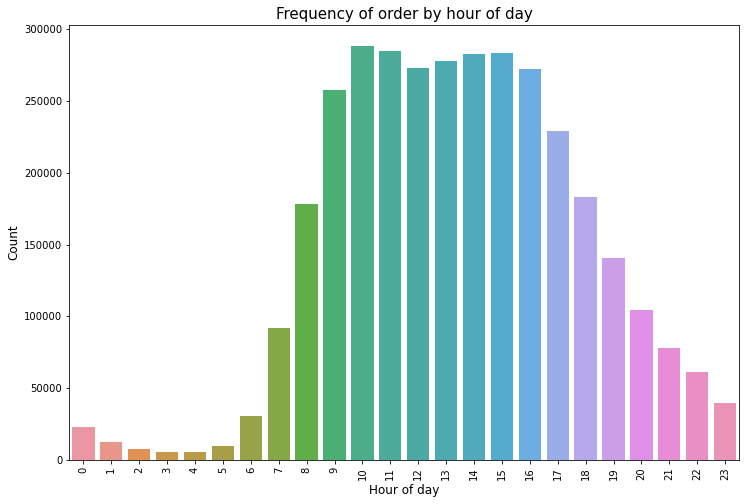

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

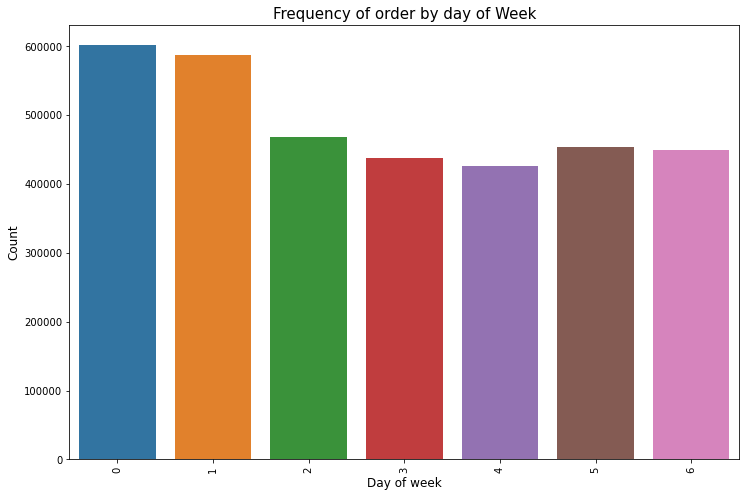

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by day of Week", fontsize=15)
plt.show()

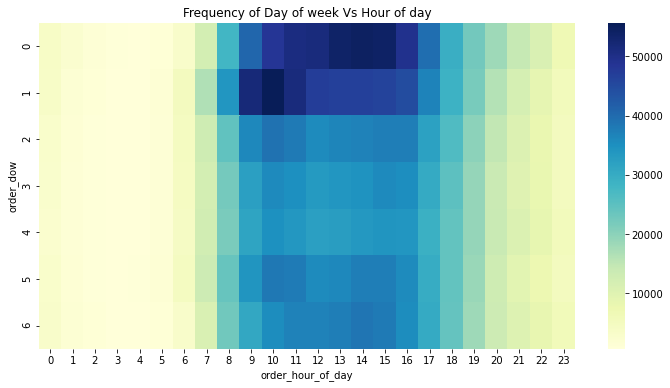

In [11]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

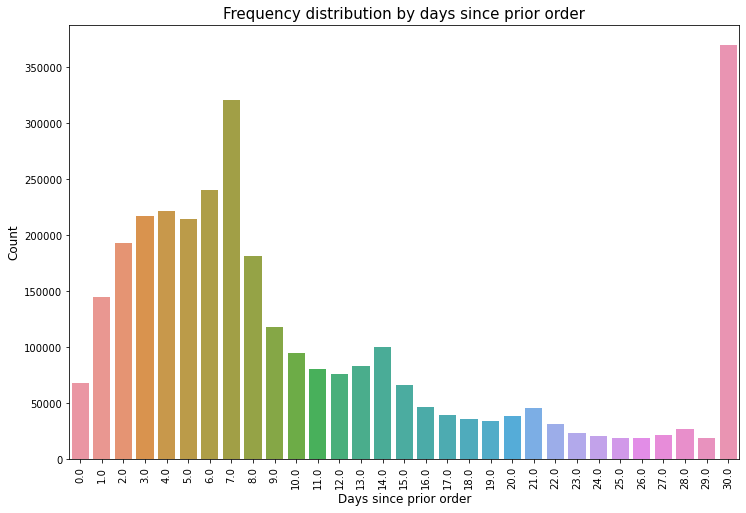

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

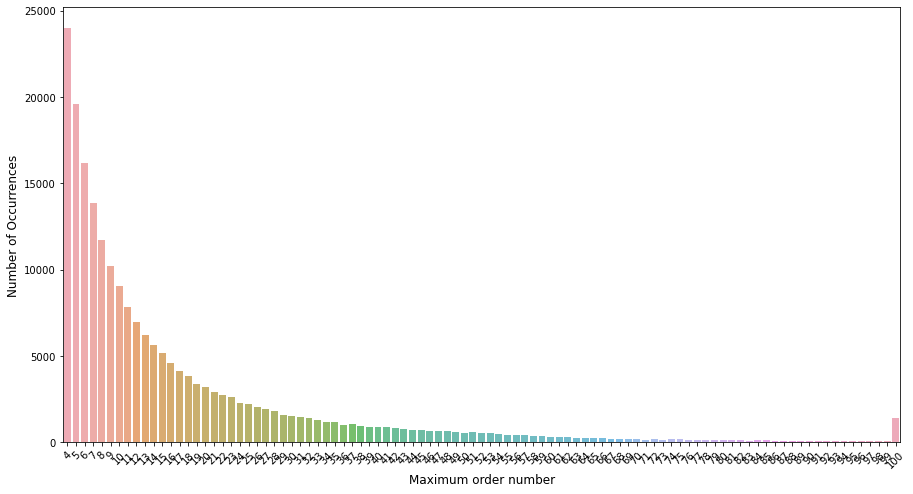

In [13]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation=45)
plt.show()

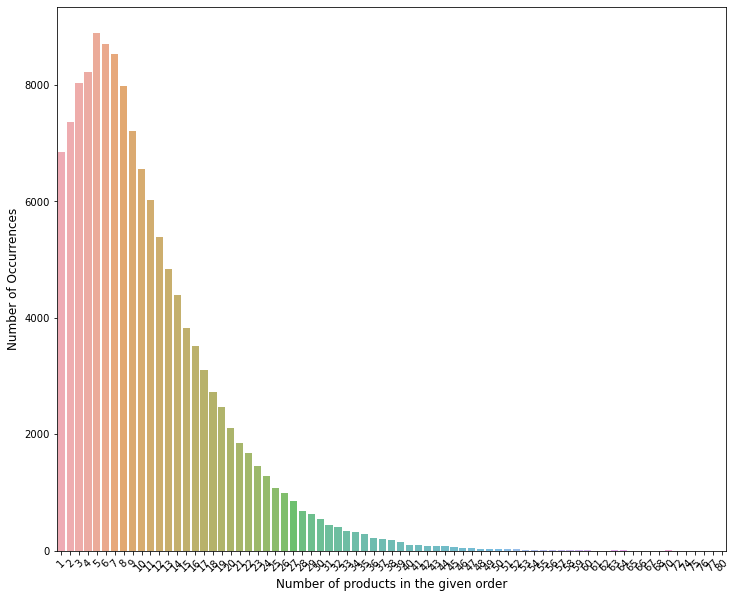

In [14]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation=45)
plt.show()

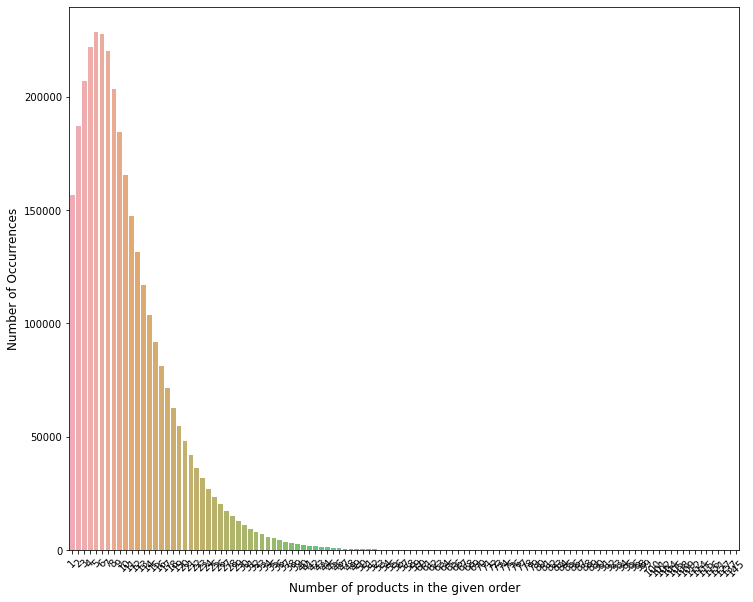

In [15]:
grouped_df = order_products_prior_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [16]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.value_counts(normalize=True)

1    0.589697
0    0.410303
Name: reordered, dtype: float64

In [17]:
# percentage of re-orders in train set #
order_products_train_df.reordered.value_counts(normalize=True)

1    0.598594
0    0.401406
Name: reordered, dtype: float64

In [18]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
len(grouped_df[grouped_df['reordered']==0])/len(grouped_df)

0.12084859313304347

In [19]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
len(grouped_df[grouped_df['reordered']==0])/len(grouped_df)

0.06555952716658156

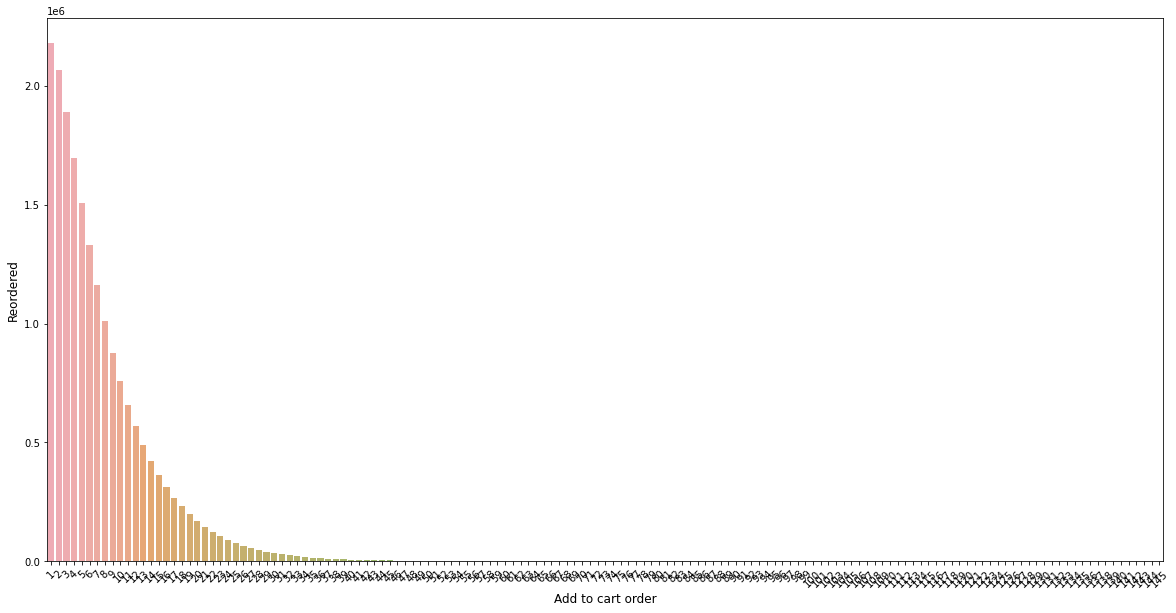

In [21]:
grouped_df = order_products_prior_df.groupby("add_to_cart_order")["reordered"].aggregate("sum").reset_index()
plt.figure(figsize=(20,10))
sns.barplot(grouped_df.add_to_cart_order, grouped_df.reordered, alpha=0.8)
plt.ylabel('Reordered', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.xticks(rotation=45)
plt.show()

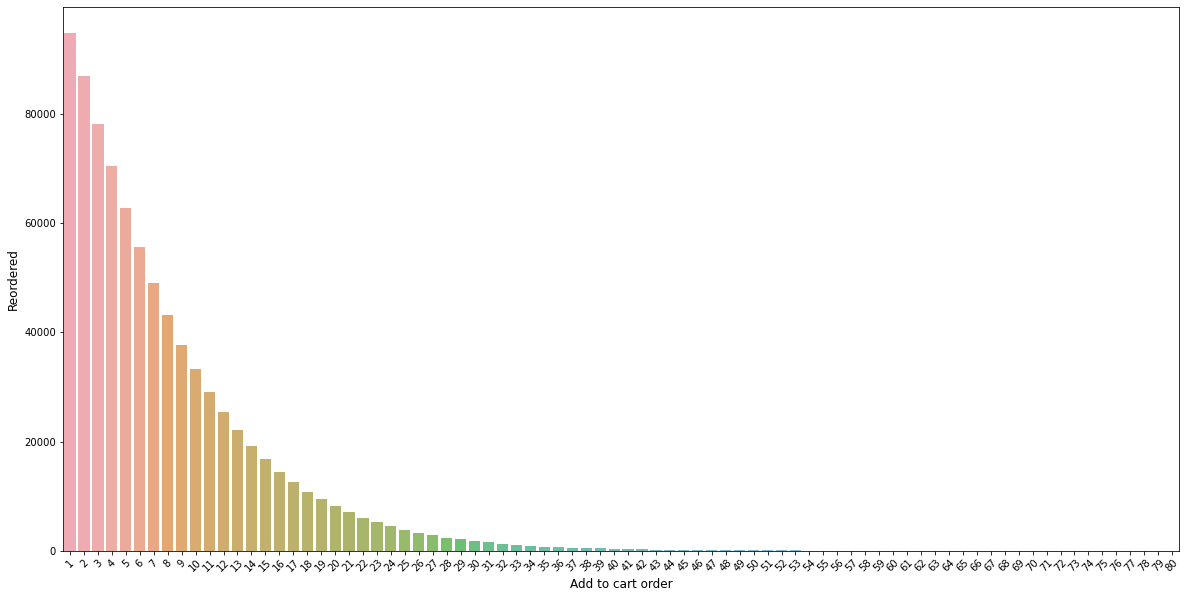

In [22]:
grouped_df = order_products_train_df.groupby("add_to_cart_order")["reordered"].aggregate("sum").reset_index()
plt.figure(figsize=(20,10))
sns.barplot(grouped_df.add_to_cart_order, grouped_df.reordered, alpha=0.8)
plt.ylabel('Reordered', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Merge products, aisle, departments and order_product_prior tables 

In [23]:
merged_order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
merged_order_products_prior_df = pd.merge(merged_order_products_prior_df, aisles_df, on='aisle_id', how='left')
merged_order_products_prior_df = pd.merge(merged_order_products_prior_df, departments_df, on='department_id', how='left')
merged_order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


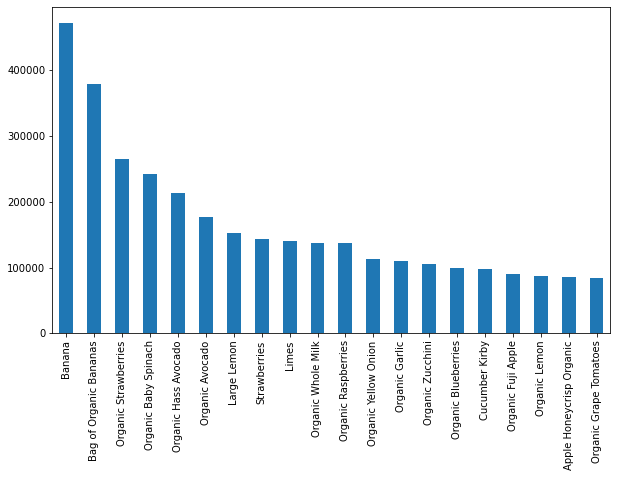

In [37]:
plt.figure(figsize=(10,6))
merged_order_products_prior_df['product_name'].value_counts().head(20).plot.bar()
plt.show()

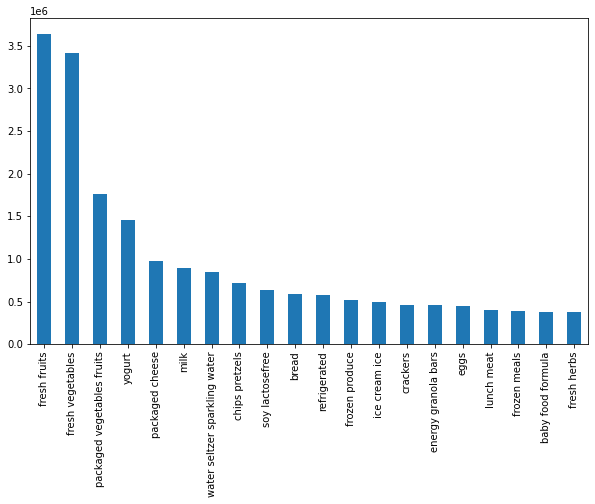

In [38]:
plt.figure(figsize=(10,6))
merged_order_products_prior_df['aisle'].value_counts().head(20).plot.bar()
plt.show()

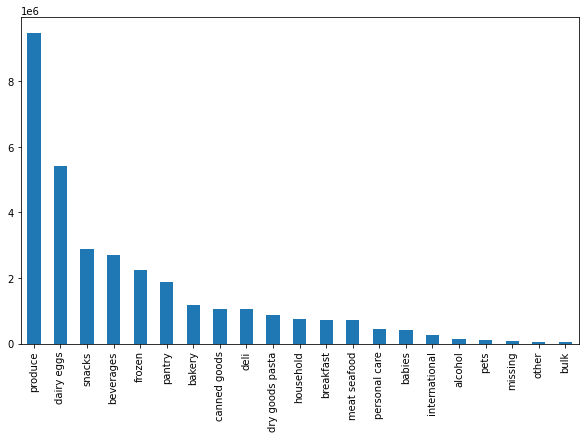

In [39]:
plt.figure(figsize=(10,6))
merged_order_products_prior_df['department'].value_counts().plot.bar()
plt.show()

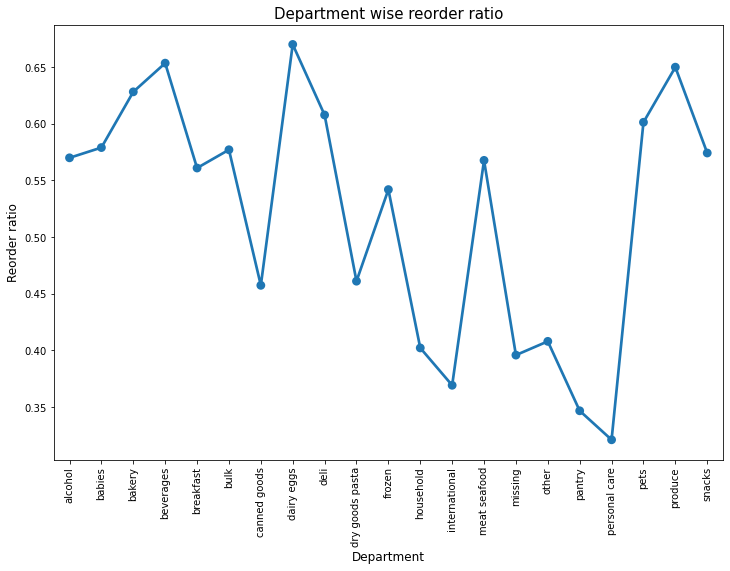

In [49]:
grouped_df = merged_order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation=90)
plt.show()

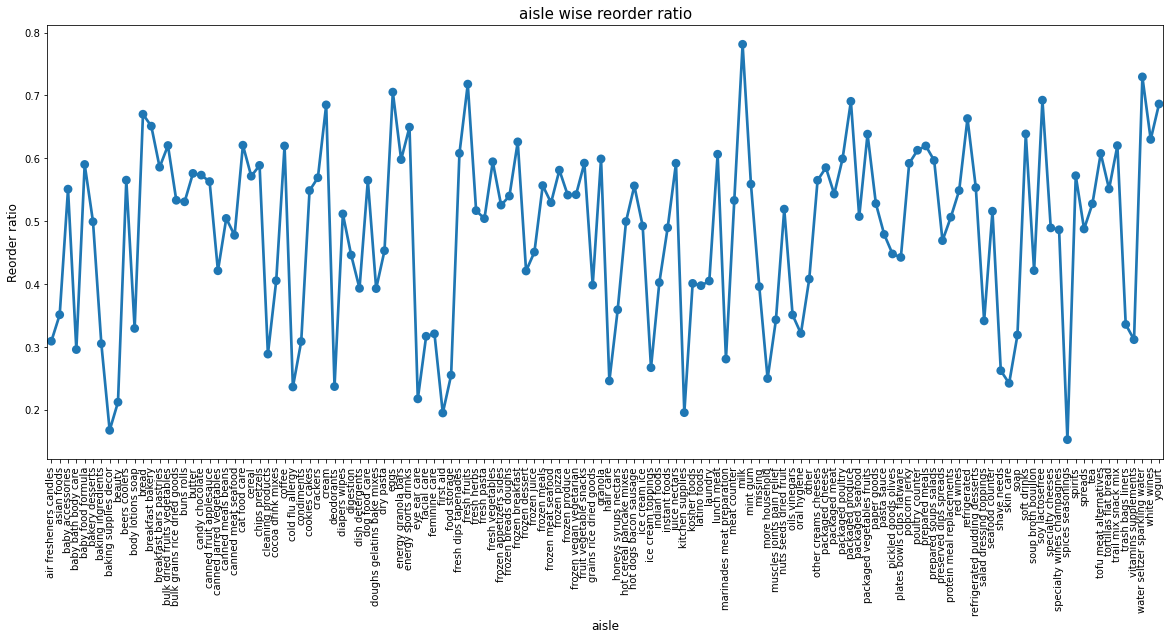

In [48]:
grouped_df = merged_order_products_prior_df.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(20,8))
sns.pointplot(grouped_df['aisle'].values, grouped_df['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('aisle', fontsize=12)
plt.title("aisle wise reorder ratio", fontsize=15)
plt.xticks(rotation=90)
plt.show()

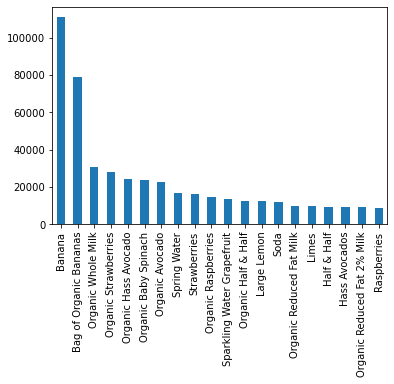

In [51]:
merged_order_products_prior_df[merged_order_products_prior_df['add_to_cart_order'] ==1]['product_name'].value_counts().head(20).plot.bar()

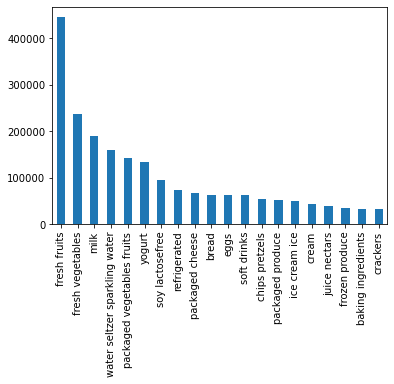

In [52]:
merged_order_products_prior_df[merged_order_products_prior_df['add_to_cart_order'] ==1]['aisle'].value_counts().head(20).plot.bar()

## Inference:
1. Most of the orders are done in the day time i.e., between 10am to 3pm.
2. Least orders are made in early morning.
3. Most orders are made on days 0 and 1. There is no info regarding which values represent which day, so we can assume that they are weekends.
4. We can observe that day 0 afternoon (12pm-3pm) and day 1 mornings are the prime time for orders.
5. Seems like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days).
6. We can verify the claim that that 4 to 100 orders of a customer are given.
7. We can see that people most often order around 5 items. The distributions are comparable between the train and prior order set.
8. On an average, about 59% of the products in an order are re-ordered products.
9. About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%
10. First product added in the cart has the most number of reorders. Reorders decreases with the order in which the product is added in the cart increases.
11. Clearly we can see products like fruits and vegitables are most popular.
12. In department Dairy eggs has highest reorder ratio and Personal care has lowest reorder ratio.
13. In asile, Milk has highest reorder ratio and spices seasoning, baking supplies decor has lowest reorder ratio